In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Step 2: Load and Prepare the Data
df = pd.read_csv('Iris.csv')

# Drop 'Id' column if it exists
df.drop(columns=['Id'], inplace=True, errors='ignore')

# Features and labels
X = df.drop('Species', axis=1)
y = df['Species']


In [3]:
# Step 3: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


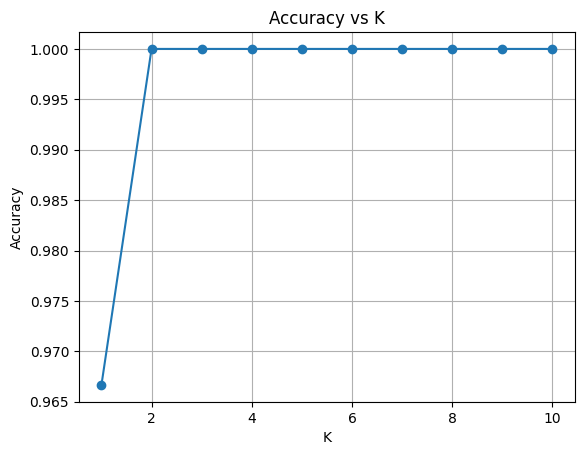

In [5]:
# Step 5: Experiment with Different Values of K
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid()
plt.show()


Best K: 2
Accuracy: 1.0


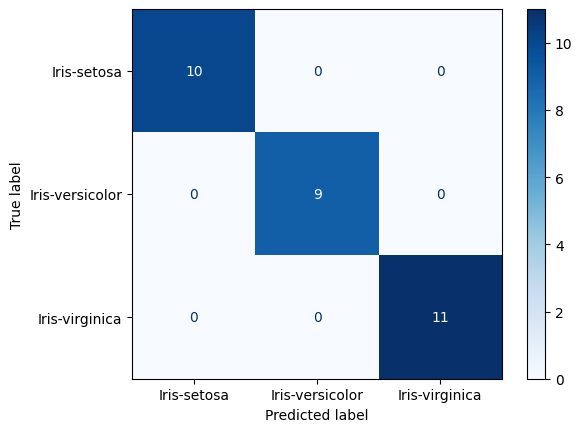

In [6]:
# Step 6: Final Model Evaluation (choose best K, e.g., k=3)
best_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy and Confusion Matrix
print(f"Best K: {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.show()


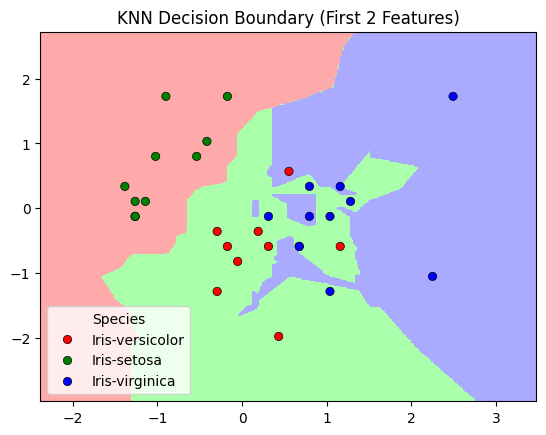

In [8]:
# Step 7: (Optional) Visualize Decision Boundaries using 2 Features
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert string labels in Z to numerical values
    # Get unique labels from the training data (or all y values)
    unique_labels = np.unique(model.classes_)
    # Create a mapping from label string to integer
    label_to_int = {label: i for i, label in enumerate(unique_labels)}
    # Apply the mapping to the predicted values Z
    Z_numeric = np.array([label_to_int[label] for label in Z])

    Z_numeric = Z_numeric.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    # Use the same colormap for the scatter plot and contour plot
    # The number of colors should match the number of unique classes
    cmap_bold = ['red', 'green', 'blue']
    if len(unique_labels) > len(cmap_bold):
        print("Warning: More unique labels than colors in cmap_bold.")
        # You might need to define more colors here

    plt.figure()
    # Use the numerical Z and the light colormap for the contour fill
    plt.contourf(xx, yy, Z_numeric, cmap=cmap_light)
    # For the scatter plot, use the original X and y, and the bold colormap
    # sns.scatterplot automatically handles mapping hue to colors
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.show()

# Reduce to 2 features for plotting
X_2d = X_scaled[:, :2]  # Use only first two features
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train2d, y_train2d)

# Call the function with the numerical X_test2d and original y_test2d
plot_decision_boundary(X_test2d, y_test2d, knn_2d, "KNN Decision Boundary (First 2 Features)")